In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random



In [16]:
# import data from file
file_name = '../data/df_road.csv'
df_road = pd.read_csv(file_name)

In [17]:
df_road.head()

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN


In [22]:
df_road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2800 non-null   int64  
 1   length        2800 non-null   float64
 2   condition     1353 non-null   object 
 3   lat           2800 non-null   float64
 4   lon           2800 non-null   float64
 5   intersection  1427 non-null   object 
 6   model_type    2800 non-null   object 
 7   id            2800 non-null   int64  
 8   road          2800 non-null   object 
 9   name          1 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 218.9+ KB


In [18]:
roads= df_road['road'].unique()

for road in roads:
    print(road)

N1
N2
N105
N102
N104
N111
N107
N108
N109
N110


In [19]:
# create the dataframe for the road only contains N1
road_N1 = df_road[df_road['road'] == 'N1']

In [20]:
# create the dataframe for the road only contains both N1 and N102
road_N1_N102 = df_road[df_road['road'].isin(['N1', 'N102'])]

In [21]:
road_N1_N102.head()

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN


In [29]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()
    print("Sourcesink nodes: ", sourcesink_nodes)

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
        print(f"Source node: {source}, Sink node: {sink}")
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")

    path_distance = nx.shortest_path_length(G, source, sink, weight='weight')
    driving_distance.append(path_distance)
    print (f"Driving distance list: {driving_distance} ")

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N104_90, Sink node: N106_173


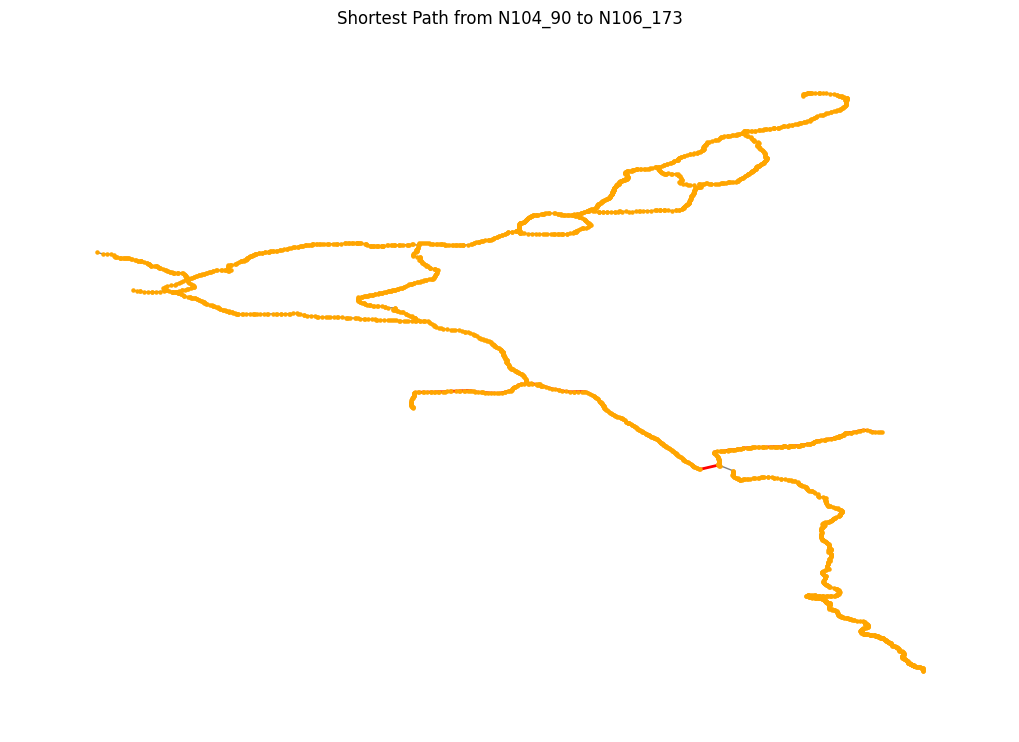

Shortest path from N104_90 to N106_173: ['N104_90', 'N104_89', 'N104_88', 'N104_87', 'N104_86', 'N104_85', 'N104_84', 'N104_83', 'N104_82', 'N104_81', 'N104_80', 'N104_79', 'N104_78', 'N104_77', 'N104_76', 'N104_75', 'N104_74', 'N104_73', 'N104_72', 'N104_71', 'N104_70', 'N104_69', 'N104_68', 'N104_67', 'N104_66', 'N104_65', 'N104_64', 'N104_63', 'N104_62', 'N104_61', 'N104_60', 'N104_59', 'N104_58', 'N104_57', 'N104_56', 'N104_55', 'N104_54', 'N104_53', 'N104_52', 'N104_51', 'N104_50', 'N104_49', 'N104_48', 'N104_47', 'N104_46', 'N104_45', 'N104_44', 'N104_43', 'N104_42', 'N104_41', 'N104_40', 'N104_39', 'N104_38', 'N104_37', 'N104_36', 'N104_35', 'N104_34', 'N104_33', 'N104_32', 'N104_31', 'N104_30', 'N104_29', 'N104_28', 'N104_27', 'N104_26', 'N104_25', 'N104_24', 'N104_23', 'N104_22', 'N104_21', 'N104_20', 'N104_19', 'N104_18', 'N104_17', 'N104_16', 'N104_15', 'N104_14', 'N104_13', 'N104_12', 'N104_11', 'N104_10', 'N104_9', 'N104_8', 'N104_7', 'N104_6', 'N104_5', 'N104_4N1_265', 'N

In [25]:
find_shortest_path_from_sourcesink(df_road)

In [34]:
def create_network(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.

    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.iloc[i]['road'] == df.iloc[i + 1]['road']: # Ensure edges are within the same road
            G.add_edge(df.iloc[i]['id'], df.iloc[i + 1]['id'], weight=df.iloc[i]['length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Display the graph
    plt.show()


Number of nodes:  2791
Number of edges:  2790


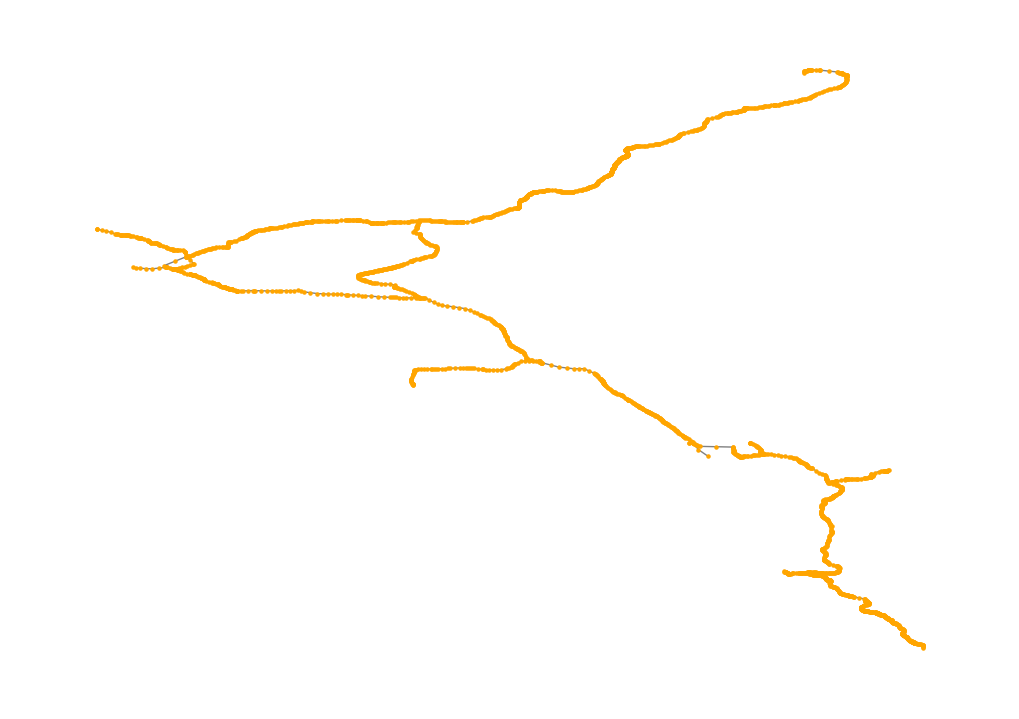

In [36]:
create_network(df_road)

In [41]:
# calculate the betweenness centrality
def betweenness_centrality(df):
    """
    Calculate the betweenness centrality of each node in the graph.
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.iloc[i]['road'] == df.iloc[i + 1]['road']: # Ensure edges are within the same road
            G.add_edge(df.iloc[i]['id'], df.iloc[i + 1]['id'], weight=df.iloc[i]['length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Display the graph
    plt.show()

    # Calculate the betweenness centrality of each node
    betweenness = nx.betweenness_centrality(G, weight='weight')

    # Filter only nodes with model_type 'bridge'
    bridges = {n: c for n, c in betweenness.items() if G.nodes[n].get('model_type') == 'bridge'}

    # Sort bridges by betweenness centrality
    sorted_bridges = sorted(bridges.items(), key=lambda x: x[1], reverse=True)

    # Print top 20 bridges
    print("\nTop 20 bridges by betweenness centrality:")
    for node, centrality in sorted_bridges[:20]:
        print(f"Bridge {node}: {centrality}")


Number of nodes:  2791
Number of edges:  2790


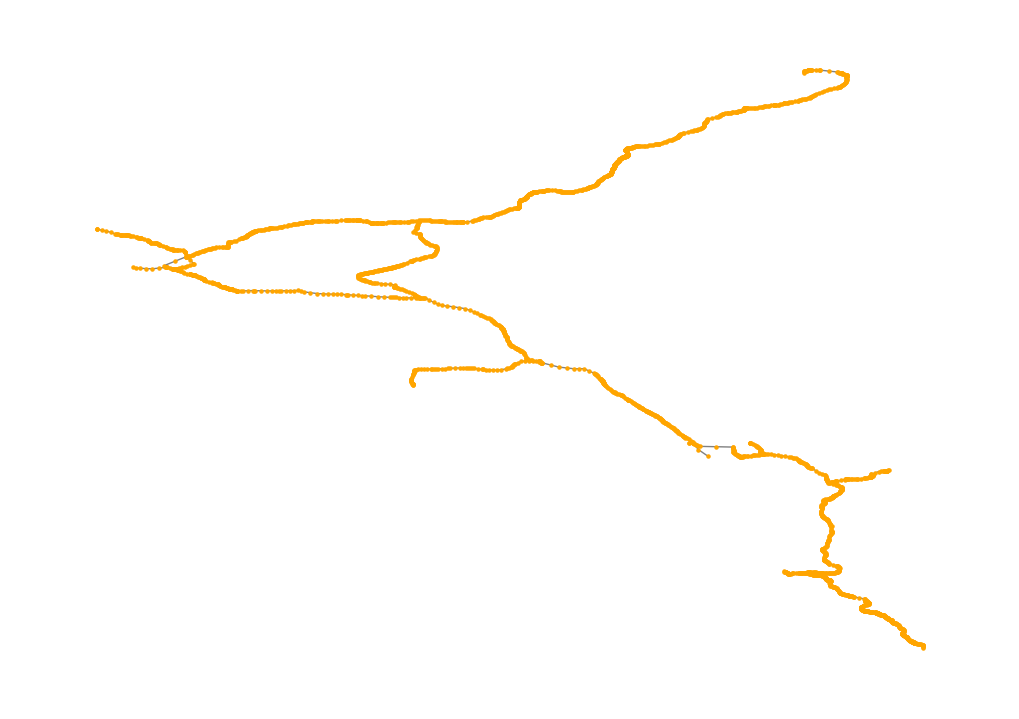


Top 20 bridges by betweenness centrality:
Bridge 11307: 0.24429501788580585
Bridge 11311: 0.24423053243926793
Bridge 11313: 0.24419520540243222
Bridge 11315: 0.24415782215655205
Bridge 11317: 0.24411838270162736
Bridge 11319: 0.24407688703765817
Bridge 11321: 0.2440333351646445
Bridge 11323: 0.24398772708258634
Bridge 11325: 0.2439400627914837
Bridge 11327: 0.24389034229133655
Bridge 11329: 0.2438385655821449
Bridge 11331: 0.24378473266390877
Bridge 11333: 0.24372884353662813
Bridge 11335: 0.24367089820030302
Bridge 11337: 0.2436108966549334
Bridge 11339: 0.24354883890051932
Bridge 11341: 0.24348472493706072
Bridge 11343: 0.24341855476455762
Bridge 11345: 0.24335032838301004
Bridge 11347: 0.24328004579241796


In [42]:
betweenness_centrality(df_road)